# Loading and using models from the BioImage Model Zoo

This notebook shows how to interact with the `bioimageio.core` programmatically to explore, load and use content from the [BioImage Model Zoo](https://bioimage.io). To conveniently inspect and edit models, you can also check out the [model builder GUI](https://github.com/kreshuklab/bioimageio_rs/releases).

## Dependency installation. ONLY FOR GOOGLE COLAB!

In [ ]:
import os

# install dependencies if running in colab
if os.getenv("COLAB_RELEASE_TAG"):
    %pip install bioimageio.core
    %pip install torch
    %pip install matplotlib
    !git clone https://github.com/bioimage-io/AI4Life_CommunityEvent_W1S2.git
else:
    print("Not running in Colab, skipping")

Not running in Colab, skipping


## 0. Load dependencies

In [2]:
#@markdown ## Load dependencies
### 0.1.Enable pretty_validation_errors
# This function displays validation errors in a human readable format.
from bioimageio.spec.pretty_validation_errors import (
    enable_pretty_validation_errors_in_ipynb,
)

enable_pretty_validation_errors_in_ipynb()
### 0.2. Load general dependencies
# Load general dependencies
import os
from pathlib import Path
from pprint import pprint
import bioimageio.core
import bioimageio.spec
import matplotlib.pyplot as plt
import numpy as np
from typing import Union, Mapping, Any
from numpy.typing import NDArray

from imageio.v2 import imread
from bioimageio.spec.model import v0_5
from bioimageio.spec.model.v0_5 import TensorId, ModelDescr
from bioimageio.spec.utils import load_array
from bioimageio.core.digest_spec import get_test_inputs
from bioimageio.spec.utils import download
from bioimageio.core import Tensor
from bioimageio.core import Sample
from bioimageio.core import predict, predict_many
from bioimageio.core import create_prediction_pipeline
from bioimageio.core import test_model
from bioimageio.core import load_description


# Function to display input and prediction output images
def show_images(images: Union[Mapping[str, NDArray[Any]], Mapping[TensorId, Union[Tensor, NDArray[Any]]]]) -> None:

    for title, image in images.items():
        if isinstance(image, Tensor):
            input_array = image.data.data
        else:
            input_array = image

        # Check for the number of channels to enable display
        input_array = np.squeeze(input_array)
        if len(input_array.shape) > 2:
            input_array = input_array[0]
        _ = plt.imshow(input_array)
        _ = plt.title(title)
        _ = plt.axis("off")
        plt.show()

print("Dependencies loaded")
print(f"biomageio.specs version {bioimageio.spec.__version__} is used")
print(f"biomageio.core version {bioimageio.core.__version__} is used")

Dependencies loaded
biomageio.specs version 0.5.4.1 is used
biomageio.core version 0.8.0 is used


## 1. Load a model

### 1.1 Inspect available models in the Bioimage Model Zoo

Go to https://bioimage.io to browser available models

### 1.2 Load model from the BioImage Model Zoo

`bioimage.io` resources may be identified via their bioimage.io __ID__, e.g. "affable-shark" or the [__DOI__](https://doi.org/) of their [__Zenodo__](https://zenodo.org/) backup.

Both of these options may be version specific ("affable-shark/1" or a version specific [__Zenodo__](https://zenodo.org/) backup [__DOI__](https://doi.org/)).

Alternatively, any rdf.yaml source, single file or in a .zip, may be loaded by providing its __local path__ or __URL__.

In [3]:
BMZ_MODEL_ID = "affable-shark"  # "affable-shark"
BMZ_MODEL_DOI = ""  # "10.5281/zenodo.6287342"
BMZ_MODEL_URL = "" #"https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/draft/files/rdf.yaml"

`load_description` is a function of the `bioimageio.spec` package, but as it is a sub-package of `bioimageio.core` it can also be called from it by `bioimageio.core.load_description`.

To learn more about the functionalities of the `bioimageio.spec` package, see the [bioimageio.spec package example notebook](https://github.com/bioimage-io/spec-bioimage-io/blob/main/example/load_model_and_create_your_own.ipynb), also available as a [Google Colab](https://colab.research.google.com/github/bioimage-io/spec-bioimage-io/blob/main/example/load_model_and_create_your_own.ipynb) notebook.

In [4]:
# Load the model description
# ------------------------------------------------------------------------------
if BMZ_MODEL_ID != "":
    model = load_description(BMZ_MODEL_ID)
    print(
        f"\nThe model '{model.name}' with ID '{BMZ_MODEL_ID}' has been correctly loaded."
    )
elif BMZ_MODEL_DOI != "":
    model = load_description(BMZ_MODEL_DOI)
    print(
        f"\nThe model '{model.name}' with DOI '{BMZ_MODEL_DOI}' has been correctly loaded."
    )
elif BMZ_MODEL_URL != "":
    model = load_description(BMZ_MODEL_URL)
    print(
        f"\nThe model '{model.name}' with URL '{BMZ_MODEL_URL}' has been correctly loaded."
    )
else:
    print("\nPlease specify a model ID, DOI or URL")

if "draft" in BMZ_MODEL_ID or "draft" in BMZ_MODEL_DOI or "draft" in BMZ_MODEL_URL:
    print(
        f"\nThis is the DRAFT version of '{model.name}'. \nDraft versions have not been reviewed by the Bioimage Model Zoo Team and may contain harmful code. Run with caution."
    )

2025-05-27 12:19:40.286 | Level 30 | bioimageio.spec._internal.url:_validate_url_impl:72 - Failed to validate URL 'https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/documentation.md': HTTPSConnectionPool(host='uk1s3.embassy.ebi.ac.uk', port=443): Read timed out. (read timeout=3)
request: <PreparedRequest [GET]>
response: None
2025-05-27 12:19:57.604 | Level 30 | bioimageio.spec._internal.url:_validate_url_impl:72 - Failed to validate URL 'https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/weights.onnx': HTTPSConnectionPool(host='hypha.aicell.io', port=443): Max retries exceeded with url: /bioimage-io/artifacts/affable-shark/files/weights.onnx (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x130f78ca0>, 'Connection to hypha.aicell.io timed out. (connect timeout=3)'))
request: <PreparedRequest [HEAD]>
response: None
2025-05-27 12:20:03.609 | Level 30 | bioimageio.spec._internal.url:_validate_url_impl:72 - Failed to validate URL


The model 'NucleiSegmentationBoundaryModel' with ID 'affable-shark' has been correctly loaded.


In [5]:
pprint(model)

ModelDescr(name='NucleiSegmentationBoundaryModel', description='Nucleus segmentation for fluorescence microscopy', covers=[RelativePath('cover.png')], id_emoji='🦈', authors=[Author(affiliation='EMBL Heidelberg', email=None, orcid=None, name='Constantin Pape', github_user='constantinpape')], attachments=[FileDescr(source=RelativePath('zero_mean_unit_variance.ijm'), sha256='767f2c3a50e36365c30b9e46e57fcf82e606d337e8a48d4a2440dc512813d186')], cite=[CiteEntry(text='training library', doi='10.5281/zenodo.5108853', url=None), CiteEntry(text='architecture', doi='10.1007/978-3-319-24574-4_28', url=None), CiteEntry(text='segmentation algorithm', doi='10.1038/nmeth.4151', url=None), CiteEntry(text='data', doi=None, url='https://www.nature.com/articles/s41592-019-0612-7')], license='CC-BY-4.0', git_repo=None, icon=None, links=['ilastik/stardist_dsb_training_data', 'ilastik/ilastik', 'deepimagej/deepimagej', 'imjoy/BioImageIO-Packager'], uploader=Uploader(email='thefynnbe@gmail.com', name='Fynn Be

## 2. Inspect the model metadata

Let's inspect all the model metadata. For a step-by-step inspection refer to [bioimageio.spec package example notebook](https://github.com/bioimage-io/spec-bioimage-io/blob/main/example/load_model_and_create_your_own.ipynb).

In [6]:
print(f"The model is named '{model.name}'")
print(f"Description:\n{model.description}")
print(f"License: {model.license}")

print("\nThe authors of the model are:")
pprint(model.authors)
print("\nIn addition to the authors it is maintained by:")
pprint(model.maintainers)


print("\nIf you use this model, you are expected to cite:")
pprint(model.cite)

print(f"\nFurther documentation can be found here: {model.documentation}. Note that you may need to download the model directly from the BioImage Model Zoo to access it. ")

if model.git_repo is None:
    print("\nThere is no associated GitHub repository.")
else:
    print(f"\nThere is an associated GitHub repository: {model.git_repo}.")

The model is named 'NucleiSegmentationBoundaryModel'
Description:
Nucleus segmentation for fluorescence microscopy
License: CC-BY-4.0

The authors of the model are:
[Author(affiliation='EMBL Heidelberg', email=None, orcid=None, name='Constantin Pape', github_user='constantinpape')]

In addition to the authors it is maintained by:
[Maintainer(affiliation=None, email=None, orcid=None, name='Constantin Pape', github_user='constantinpape')]

If you use this model, you are expected to cite:
[CiteEntry(text='training library', doi='10.5281/zenodo.5108853', url=None),
 CiteEntry(text='architecture', doi='10.1007/978-3-319-24574-4_28', url=None),
 CiteEntry(text='segmentation algorithm', doi='10.1038/nmeth.4151', url=None),
 CiteEntry(text='data', doi=None, url='https://www.nature.com/articles/s41592-019-0612-7')]

Further documentation can be found here: documentation.md. Note that you may need to download the model directly from the BioImage Model Zoo to access it. 

There is no associated G


 Covers of the model 'NucleiSegmentationBoundaryModel' are: 


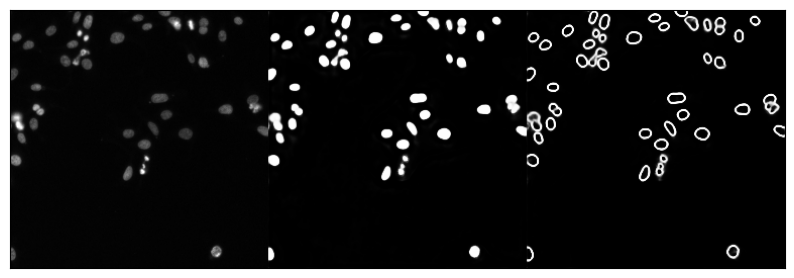

In [7]:
print(f"\n Covers of the model '{model.name}' are: ")
for cover in model.covers:
    cover_data = imread(download(cover).path)
    plt.figure(figsize=(10, 10))
    plt.imshow(cover_data)
    plt.xticks([])
    plt.yticks([])
    plt.show()

# 3. Create a new model description

Creating a model description with bioimageio.spec means creating a `bioimageio.spec.model.ModelDescr` object. This description object can be exported and uploaded to the BioImage Model Zoo or deployed directly with community partner software. Below we will go through the process of creating a model programmatically, but you can also check out the [model builder GUI](https://github.com/kreshuklab/bioimageio_rs/releases) to conveniently inspect and edit models.

Without any input arguments, initializing a `ModelDescr` will raise a `ValidationError` listing missing required fields:

In [8]:
from bioimageio.spec.model.v0_5 import ModelDescr

# Inspect the validation error
_ = ModelDescr()  # pyright: ignore[reportCallIssue]

ValidationError: 9 validation errors for ModelDescr:
name
  Field required [input={'format_version': '0.5.4', 'type': 'model'}]
description
  Field required [input={'format_version': '0.5.4', 'type': 'model'}]
authors
  Field required [input={'format_version': '0.5.4', 'type': 'model'}]
cite
  Field required [input={'format_version': '0.5.4', 'type': 'model'}]
license
  Field required [input={'format_version': '0.5.4', 'type': 'model'}]
documentation
  Field required [input={'format_version': '0.5.4', 'type': 'model'}]
inputs
  Field required [input={'format_version': '0.5.4', 'type': 'model'}]
outputs
  Field required [input={'format_version': '0.5.4', 'type': 'model'}]
weights
  Field required [input={'format_version': '0.5.4', 'type': 'model'}]

To populate a `ModelDescr` appropriately we need to create the required subparts. This is part of the model metadata needed to document the model and ensure its correct deployment.

## 3.1 Inputs

The `inputs` field is defined as a sequence of `InputTensorDescr` objects. We can inspect the required arguments for `InputTensorDescr` by attempting to intialise and inspect the validation error. A model may require multiple inputs, which should be specified as a sequence of inputs. In this example our model only requires a single input as specified below.

In [9]:
from bioimageio.spec.model.v0_5 import InputTensorDescr

# Inspect the validation error
_ = InputTensorDescr()  # pyright: ignore[reportCallIssue]

ValidationError: 2 validation errors for InputTensorDescr:
axes
  Field required [input={}]
test_tensor
  Field required [input={}]

In [ ]:
from bioimageio.spec.model.v0_5 import (
    AxisId,
    BatchAxis,
    ChannelAxis,
    HttpUrl,
    FileDescr,
    Identifier,
    InputTensorDescr,
    IntervalOrRatioDataDescr,
    ParameterizedSize,
    SpaceInputAxis,
    TensorId,
)

data_root = "https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/1.2/files/"

my_model_inputs = [
    InputTensorDescr(
        id=TensorId("raw"),
        axes=[
            BatchAxis(),
            ChannelAxis(channel_names=[Identifier("raw")]),
            SpaceInputAxis(id=AxisId("y"), size=ParameterizedSize(min=64, step=16)),
            SpaceInputAxis(id=AxisId("x"), size=ParameterizedSize(min=64, step=16)),
        ],
        data=IntervalOrRatioDataDescr(type="float32"),
        test_tensor=FileDescr(
            source=HttpUrl(data_root + "test_input_0.npy"), 
            sha256="c29bd6e16e3f7856217b407ba948222b1c2a0da41922a0f79297e25588614fe2"
        ),
        sample_tensor=FileDescr(
            source=HttpUrl(data_root + "sample_input_0.tif"), 
            sha256="a24b3c708b6ca6825494eb7c5a4d221335fb3eef5eb9d03f4108907cdaad2bf9"
        ),
    )
]

## 3.2 Outputs

The outputs field is defined as a sequence of `OutputTensorDescr` objects. We can inspect the required arguments for `OutputTensorDescr` by attempting to intialise an empty object. A model may produce multiple outputs, but in this example our model only produces a single output as specified below.

In [12]:
from bioimageio.spec.model.v0_5 import OutputTensorDescr

# Inspect the validation error
_ = OutputTensorDescr()  # pyright: ignore[reportCallIssue]

ValidationError: 2 validation errors for OutputTensorDescr:
axes
  Field required [input={}]
test_tensor
  Field required [input={}]

In [ ]:
from bioimageio.spec.model.v0_5 import (
    OutputTensorDescr,
    SizeReference,
    SpaceOutputAxisWithHalo,
)

assert isinstance(model.outputs[0].axes[1], ChannelAxis)
my_model_outputs = [
    OutputTensorDescr(
        id=TensorId("predictions"),
        axes=[
            BatchAxis(),
            ChannelAxis(
                channel_names=[
                    Identifier("nuclei_probability"),
                    Identifier("membrane_probability"),
                ]
            ),
            SpaceOutputAxisWithHalo(
                id=AxisId("y"),
                halo=16,
                size=SizeReference(tensor_id=TensorId("raw"), axis_id=AxisId("y")),
            ),  # same size as input (tensor `raw`) axis `y`
            SpaceOutputAxisWithHalo(
                id=AxisId("x"),
                halo=16,
                size=SizeReference(tensor_id=TensorId("raw"), axis_id=AxisId("x")),
            ),
        ],
        test_tensor=FileDescr(
            source=HttpUrl(data_root + "test_output_0.npy"), 
            sha256="510181f38930e59e4fd8ecc03d6ea7c980eb6609759655f2d4a41fe36108d5f5"
        ),
        sample_tensor=FileDescr(
            source=HttpUrl(data_root + "sample_output_0.tif"), 
            sha256="e8f99aabe8405427f515eba23a49f58ba50302f57d1fdfd07026e1984f836c5e"
        ),
    )
]

2025-05-27 12:36:37.981 | Level 30 | bioimageio.spec._internal.url:_validate_url_impl:72 - Failed to validate URL 'https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/1.2/files/test_output_0.npy': HTTPSConnectionPool(host='uk1s3.embassy.ebi.ac.uk', port=443): Max retries exceeded with url: /public-datasets/bioimage.io/affable-shark/1.2/files/test_output_0.npy (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x16dce39a0>, 'Connection to uk1s3.embassy.ebi.ac.uk timed out. (connect timeout=3)'))
request: <PreparedRequest [HEAD]>
response: None
2025-05-27 12:36:40.992 | Level 30 | bioimageio.spec._internal.url:_validate_url_impl:72 - Failed to validate URL 'https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/1.2/files/test_output_0.npy': HTTPSConnectionPool(host='uk1s3.embassy.ebi.ac.uk', port=443): Max retries exceeded with url: /public-datasets/bioimage.io/affable-shark/1.2/files/test_output_0.npy (Caused by ConnectT

## 3.3. Network weights

Next we need to define the network weights.

In this example we use a `PytorchStateDictWeightsDescr` to describe weights saved in PyTorch's default 'state dict' format. 

Let's see what fields we need to fill out...

In [14]:
from bioimageio.spec.model.v0_5 import PytorchStateDictWeightsDescr

_ = PytorchStateDictWeightsDescr()  # pyright: ignore[reportCallIssue]

ValidationError: 3 validation errors for PytorchStateDictWeightsDescr:
source
  Field required [input={}]
architecture
  Field required [input={}]
pytorch_version
  Field required [input={}]

### 3.3.1 Network architecture

As we use PyTorch state dict weights in this example,  in addition to the trained weights we need to specify the network architecture. 
We can specify the network architecture using either the `ArchitectureFromFileDescr` or `ArchitectureFromLibraryDescr` objects. 

Use`ArchitectureFromFileDescr` if you have a custom source code file that implements your network architecture.

Use `ArchitectureFromLibraryDescr` to reference a callable from a published Python library.

In [15]:
import torch

from bioimageio.spec.model.v0_5 import (
    ArchitectureFromFileDescr,
    Sha256,
    Version,
)

my_architecture = ArchitectureFromFileDescr(
    source=HttpUrl(data_root + "unet.py"),
    sha256=Sha256("7f5b15948e8e2c91f78dcff34fbf30af517073e91ba487f3edb982b948d099b3"),
    callable=Identifier("UNet2d"),
    kwargs=dict(
        depth=4,
        final_activation="Sigmoid",
        gain=2,
        in_channels=1,
        initial_features=64,
        out_channels=2,
        postprocessing=None,
        return_side_outputs=False,
    ),
)

2025-05-27 12:21:49.584 | Level 30 | bioimageio.spec._internal.url:_validate_url_impl:72 - Failed to validate URL 'https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/1.2/files/unet.py': HTTPSConnectionPool(host='uk1s3.embassy.ebi.ac.uk', port=443): Max retries exceeded with url: /public-datasets/bioimage.io/affable-shark/1.2/files/unet.py (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x168d789d0>, 'Connection to uk1s3.embassy.ebi.ac.uk timed out. (connect timeout=3)'))
request: <PreparedRequest [HEAD]>
response: None
2025-05-27 12:21:52.595 | Level 30 | bioimageio.spec._internal.url:_validate_url_impl:72 - Failed to validate URL 'https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/1.2/files/unet.py': HTTPSConnectionPool(host='uk1s3.embassy.ebi.ac.uk', port=443): Max retries exceeded with url: /public-datasets/bioimage.io/affable-shark/1.2/files/unet.py (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSCon

With the described architecture we can create a `PytorchStateDictWeightsDescr` like so:

In [16]:
from bioimageio.spec.model.v0_5 import PytorchStateDictWeightsDescr

my_pytorch_state_dict_weights = PytorchStateDictWeightsDescr(
    source=HttpUrl(data_root + "weights.pt"),
    sha256=Sha256("608f52cd7f5119f7a7b8272395b0c169714e8be34536eaf159820f72a1d6a5b7"),
    architecture=my_architecture,
    pytorch_version=Version(torch.__version__),
)

2025-05-27 12:22:16.521 | Level 30 | bioimageio.spec._internal.url:_validate_url_impl:72 - Failed to validate URL 'https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/1.2/files/weights.pt': HTTPSConnectionPool(host='uk1s3.embassy.ebi.ac.uk', port=443): Max retries exceeded with url: /public-datasets/bioimage.io/affable-shark/1.2/files/weights.pt (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x131811c00>, 'Connection to uk1s3.embassy.ebi.ac.uk timed out. (connect timeout=3)'))
request: <PreparedRequest [HEAD]>
response: None
2025-05-27 12:22:19.529 | Level 30 | bioimageio.spec._internal.url:_validate_url_impl:72 - Failed to validate URL 'https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/1.2/files/weights.pt': HTTPSConnectionPool(host='uk1s3.embassy.ebi.ac.uk', port=443): Max retries exceeded with url: /public-datasets/bioimage.io/affable-shark/1.2/files/weights.pt (Caused by ConnectTimeoutError(<urllib3.connect

Let's also describe TorchScript weights (that we converted from the Pytorch State Dict weights that we got from training the network). 

In [17]:
from bioimageio.spec.model.v0_5 import TorchscriptWeightsDescr

my_torchscript_weights = TorchscriptWeightsDescr(
    source=HttpUrl(data_root + "weights-torchscript.pt"),
    sha256=Sha256("8410950508655a300793b389c815dc30b1334062fc1dadb1e15e55a93cbb99a0"),
    pytorch_version=Version(torch.__version__),
    parent="pytorch_state_dict",  # these weights were converted from the pytorch_state_dict weights ones.
)

2025-05-27 12:22:22.731 | Level 30 | bioimageio.spec._internal.url:_validate_url_impl:72 - Failed to validate URL 'https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/1.2/files/weights-torchscript.pt': HTTPSConnectionPool(host='uk1s3.embassy.ebi.ac.uk', port=443): Max retries exceeded with url: /public-datasets/bioimage.io/affable-shark/1.2/files/weights-torchscript.pt (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x1318121d0>, 'Connection to uk1s3.embassy.ebi.ac.uk timed out. (connect timeout=3)'))
request: <PreparedRequest [HEAD]>
response: None
2025-05-27 12:22:25.741 | Level 30 | bioimageio.spec._internal.url:_validate_url_impl:72 - Failed to validate URL 'https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/1.2/files/weights-torchscript.pt': HTTPSConnectionPool(host='uk1s3.embassy.ebi.ac.uk', port=443): Max retries exceeded with url: /public-datasets/bioimage.io/affable-shark/1.2/files/weights-torchscript.pt

## 3.4 FAIR metadata

In [18]:
from bioimageio.spec.model.v0_5 import (
    Author,
    CiteEntry,
    Doi,
    HttpUrl,
    LicenseId,
)

my_model_name = "My cool Model"
my_model_description = "A test model for demonstration purposes only"
my_model_authors = [
    Author(name="me", affiliation="my institute", github_user="bioimageiobot")
]  # change github_user to your GitHub account name
my_model_citations = [
    CiteEntry(text="for model training see my paper", doi=Doi("10.1234something"))
]
my_model_license = LicenseId("MIT")
my_model_documentation = HttpUrl(
    "https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/1.2/files/documentation.md"
)
my_model_git_repo = HttpUrl("https://github.com/constantinpape/torch-em")

## 3.5 Putting it all together to create your model

Amazing!!! You are now ready to put it all together into a single model description.

In [19]:
from bioimageio.spec.model.v0_5 import WeightsDescr

my_model = ModelDescr(
    name=my_model_name,
    description=my_model_description,
    documentation=my_model_documentation,
    authors=my_model_authors,
    cite=my_model_citations,
    license=my_model_license,
    git_repo=my_model_git_repo,  # change to repo where your model is developed
    inputs=my_model_inputs,
    # inputs=[input_descr],  # try out our recreated input description
    outputs=my_model_outputs,
    # outputs=[output_descr],  # try out our recreated input description
    weights=WeightsDescr(
        pytorch_state_dict=my_pytorch_state_dict_weights,
        torchscript=my_torchscript_weights,
    ),
)
print(f"created '{my_model.name}'")

2025-05-27 12:22:56.725 | Level 30 | bioimageio.spec._internal.url:_validate_url_impl:72 - Failed to validate URL 'https://github.com/constantinpape/torch-em': HTTPSConnectionPool(host='github.com', port=443): Max retries exceeded with url: /constantinpape/torch-em (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x168d797b0>, 'Connection to github.com timed out. (connect timeout=3)'))
request: <PreparedRequest [HEAD]>
response: None
2025-05-27 12:22:59.730 | Level 30 | bioimageio.spec._internal.url:_validate_url_impl:72 - Failed to validate URL 'https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/1.2/files/documentation.md': HTTPSConnectionPool(host='uk1s3.embassy.ebi.ac.uk', port=443): Max retries exceeded with url: /public-datasets/bioimage.io/affable-shark/1.2/files/documentation.md (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x168d7abc0>, 'Connection to uk1s3.embassy.ebi.ac.uk timed out. (connect ti

created 'My cool Model'


#### An extra note -- Default values (e.g. Covers)

Some optional fields may be filled with default values, e.g., we did not specify the optional `covers` field.
When possible, a default visualization of the test inputs and test outputs is generated.
When the input or the output have more than one channel, the current implementation cannot generate a cover image automatically.

## 3.6 Validation summary and test of the model
Models in the BioImage Model Zoo are validated and tested before publication. The result of these quality checks is accessible through code.


### 3.6.1 Validation summary
To inspect the corresponding validation summary access the `validation_summary` attribute.

The validation summary will indicate:
- the version of the `bioimageio.spec` library used to run the validation
- the status of several validation steps
    - ✔️: Success
    - 🔍: information about the validation context
    - ⚠: Warning
    - ❌: Error

To display the validaiton summary in a terminal or notebook we recommend to run:

In [20]:
model.validation_summary.display()

🟡 
 bioimageio format validation 
 
 
 status 
 valid-format 
 
 
 source 
 https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/rdf.yaml 
 
 
 id 
 10.5281/zenodo.5764892/6647674 
 
 
 format version 
 model 0.5.4 
 
 
 bioimageio.spec 
 0.5.4.1 
 
 
 
 
 
 Location 
 Details 
 
 
 ✔️ 
 
 Successfully created `ModelDescr` object. 
 
 
 🔍 
 `context:perform_io_checks` 
 True 
 
 
 🔍 
 `context:root` 
 https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files 
 
 
 🔍 
 `context:known_files.zero_mean_unit_variance.ijm` 
 767f2c3a50e36365c30b9e46e57fcf82e606d337e8a48d4a2440dc512813d186 
 
 
 🔍 
 `context:known_files.test_input_0.npy` 
 c29bd6e16e3f7856217b407ba948222b1c2a0da41922a0f79297e25588614fe2 
 
 
 🔍 
 `context:known_files.sample_input_0.tif` 
 a24b3c708b6ca6825494eb7c5a4d221335fb3eef5eb9d03f4108907cdaad2bf9 
 
 
 🔍 
 `context:known_files.test_output_0.npy` 
 510181f38930e59e4fd8ecc03d6ea7c980eb6609759655f2d4a41fe36108d5f5 
 
 
 🔍 
 `context:known_files.sample_output_0.tif` 
 e8f99aabe8405427f515eba23a49f58ba50302f57d1fdfd07026e1984f836c5e 
 
 
 🔍 
 `context:known_files.weights.onnx` 
 df913b85947f5132bcdaf81d91af0963f60d44f4caf8a4fec672d96a2f327b44 
 
 
 🔍 
 `context:known_files.unet.py` 
 7f5b15948e8e2c91f78dcff34fbf30af517073e91ba487f3edb982b948d099b3 
 
 
 🔍 
 `context:known_files.weights.pt` 
 608f52cd7f5119f7a7b8272395b0c169714e8be34536eaf159820f72a1d6a5b7 
 
 
 🔍 
 `context:known_files.weights-torchscript.pt` 
 8410950508655a300793b389c815dc30b1334062fc1dadb1e15e55a93cbb99a0 
 
 
 ✔️ 
 
 bioimageio.spec format validation model 0.5.4 
 
 
 ⚠ 
 covers.0.(RelativeFilePath) 
 Failed to validate URL 'https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/cover.png': HTTPSConnectionPool(host='hypha.aicell.io', port=443): Max retries exceeded with url: /bioimage-io/artifacts/affable-shark/files/cover.png (Caused by ConnectTimeoutError( , 'Connection to hypha.aicell.io timed out. (connect timeout=3)'))
request: 
response: None 
 
 
 ⚠ 
 attachments.0.source.(RelativeFilePath) 
 Failed to validate URL 'https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/zero_mean_unit_variance.ijm': HTTPSConnectionPool(host='uk1s3.embassy.ebi.ac.uk', port=443): Max retries exceeded with url: /bioimage.io/bioimage-io/artifacts/019362ed-0513-7ba3-96d6-b05ebc32fca7/v0/zero_mean_unit_variance.ijm?AWSAccessKeyId=2J00NV4L2B6QC5707X6T&Signature=XjczGZMqh8yBQyQJTM29tAvDcbg%3D&Expires=1748341219 (Caused by ConnectTimeoutError( , 'Connection to uk1s3.embassy.ebi.ac.uk timed out. (connect timeout=3)'))
request: 
response: None 
 
 
 ⚠ 
 cite.3.url 
 Failed to validate URL 'https://www.nature.com/articles/s41592-019-0612-7': HTTPSConnectionPool(host='www.nature.com', port=443): Max retries exceeded with url: /articles/s41592-019-0612-7 (Caused by ConnectTimeoutError( , 'Connection to www.nature.com timed out. (connect timeout=3)'))
request: 
response: None 
 
 
 ⚠ 
 documentation.(RelativeFilePath) 
 Failed to validate URL 'https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/documentation.md': HTTPSConnectionPool(host='hypha.aicell.io', port=443): Max retries exceeded with url: /bioimage-io/artifacts/affable-shark/files/documentation.md (Caused by ConnectTimeoutError( , 'Connection to hypha.aicell.io timed out. (connect timeout=3)'))
request: 
response: None 
 
 
 ⚠ 
 inputs.0.test_tensor.source.(RelativeFilePath) 
 Failed to validate URL 'https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/test_input_0.npy': HTTPSConnectionPool(host='hypha.aicell.io', port=443): Max retries exceeded with url: /bioimage-io/artifacts/affable-shark/files/test_input_0.npy (Caused by ConnectTimeoutError( , 'Connection to hypha.aicell.io timed out. (connect timeout=3)'))
request: 
response: None 
 
 
 ⚠ 
 inputs.0.sample_tensor.source.(RelativeFilePath) 
 Failed to validate URL 'https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/sample_input_0.tif': HTTPSConnectionPool(host='hypha.aicell

### 3.6.2 Test the model
The `bioimageio.core.test_model` function can be used to fully test the model.
This is done by running the predicition on the test input(s) and checking that they agree with the test output(s) provided in the model documentation.

This test should be run before using the model to ensure that it works properly.

----

`bioimageio.core.test_model` returns a validation dictionary with 'status'='passed'/'failed' and other detailed information that can be inspected by calling `.display()` on it.

The validation summary will indicate:
- the versions of the `bioimageio.spec` and `bioimageio.core` libraries used to run the validation
- the status of several validation steps
    - ✔️: Success
    - 🔍: information about the validation context
    - ⚠: Warning
    - ❌: Error

In [21]:
## Pytorch model is tested for the purpose of this example, but given the correct python environment setup, other weight formats could be tested (e.g., ONNX or TensorFlow)
test_summary = test_model(model, weight_format='pytorch_state_dict')
test_summary.display()

2025-05-27 12:23:02.928 | DEBUG    | bioimageio.core._resource_tests:_test_model_inference:593 - starting 'Reproduce test outputs from test inputs (pytorch_state_dict)'


2025-05-27 12:23:04.566 | INFO     | bioimageio.core._resource_tests:_test_model_inference_parametrized:705 - Testing inference with 6 different inputs (B, N): {(1, 2), (2, 1), (1, 1), (2, 0), (2, 2), (1, 0)}


✔️ 
 bioimageio format validation 
 
 
 status 
 passed 
 
 
 source 
 https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/rdf.yaml 
 
 
 id 
 10.5281/zenodo.5764892/6647674 
 
 
 format version 
 model 0.5.4 
 
 
 bioimageio.spec 
 0.5.4.1 
 
 
 bioimageio.core 
 0.8.0 
 
 
 
 
 
 Location 
 Details 
 
 
 ✔️ 
 
 Successfully created `ModelDescr` object. 
 
 
 🔍 
 `context:perform_io_checks` 
 True 
 
 
 🔍 
 `context:root` 
 https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files 
 
 
 🔍 
 `context:known_files.zero_mean_unit_variance.ijm` 
 767f2c3a50e36365c30b9e46e57fcf82e606d337e8a48d4a2440dc512813d186 
 
 
 🔍 
 `context:known_files.test_input_0.npy` 
 c29bd6e16e3f7856217b407ba948222b1c2a0da41922a0f79297e25588614fe2 
 
 
 🔍 
 `context:known_files.sample_input_0.tif` 
 a24b3c708b6ca6825494eb7c5a4d221335fb3eef5eb9d03f4108907cdaad2bf9 
 
 
 🔍 
 `context:known_files.test_output_0.npy` 
 510181f38930e59e4fd8ecc03d6ea7c980eb6609759655f2d4a41fe36108d5f5 
 
 
 🔍 
 `context:known_files.sample_output_0.tif` 
 e8f99aabe8405427f515eba23a49f58ba50302f57d1fdfd07026e1984f836c5e 
 
 
 🔍 
 `context:known_files.weights.onnx` 
 df913b85947f5132bcdaf81d91af0963f60d44f4caf8a4fec672d96a2f327b44 
 
 
 🔍 
 `context:known_files.unet.py` 
 7f5b15948e8e2c91f78dcff34fbf30af517073e91ba487f3edb982b948d099b3 
 
 
 🔍 
 `context:known_files.weights.pt` 
 608f52cd7f5119f7a7b8272395b0c169714e8be34536eaf159820f72a1d6a5b7 
 
 
 🔍 
 `context:known_files.weights-torchscript.pt` 
 8410950508655a300793b389c815dc30b1334062fc1dadb1e15e55a93cbb99a0 
 
 
 ✔️ 
 
 bioimageio.spec format validation model 0.5.4 
 
 
 ⚠ 
 covers.0.(RelativeFilePath) 
 Failed to validate URL 'https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/cover.png': HTTPSConnectionPool(host='hypha.aicell.io', port=443): Max retries exceeded with url: /bioimage-io/artifacts/affable-shark/files/cover.png (Caused by ConnectTimeoutError( , 'Connection to hypha.aicell.io timed out. (connect timeout=3)'))
request: 
response: None 
 
 
 ⚠ 
 attachments.0.source.(RelativeFilePath) 
 Failed to validate URL 'https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/zero_mean_unit_variance.ijm': HTTPSConnectionPool(host='uk1s3.embassy.ebi.ac.uk', port=443): Max retries exceeded with url: /bioimage.io/bioimage-io/artifacts/019362ed-0513-7ba3-96d6-b05ebc32fca7/v0/zero_mean_unit_variance.ijm?AWSAccessKeyId=2J00NV4L2B6QC5707X6T&Signature=XjczGZMqh8yBQyQJTM29tAvDcbg%3D&Expires=1748341219 (Caused by ConnectTimeoutError( , 'Connection to uk1s3.embassy.ebi.ac.uk timed out. (connect timeout=3)'))
request: 
response: None 
 
 
 ⚠ 
 cite.3.url 
 Failed to validate URL 'https://www.nature.com/articles/s41592-019-0612-7': HTTPSConnectionPool(host='www.nature.com', port=443): Max retries exceeded with url: /articles/s41592-019-0612-7 (Caused by ConnectTimeoutError( , 'Connection to www.nature.com timed out. (connect timeout=3)'))
request: 
response: None 
 
 
 ⚠ 
 documentation.(RelativeFilePath) 
 Failed to validate URL 'https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/documentation.md': HTTPSConnectionPool(host='hypha.aicell.io', port=443): Max retries exceeded with url: /bioimage-io/artifacts/affable-shark/files/documentation.md (Caused by ConnectTimeoutError( , 'Connection to hypha.aicell.io timed out. (connect timeout=3)'))
request: 
response: None 
 
 
 ⚠ 
 inputs.0.test_tensor.source.(RelativeFilePath) 
 Failed to validate URL 'https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/test_input_0.npy': HTTPSConnectionPool(host='hypha.aicell.io', port=443): Max retries exceeded with url: /bioimage-io/artifacts/affable-shark/files/test_input_0.npy (Caused by ConnectTimeoutError( , 'Connection to hypha.aicell.io timed out. (connect timeout=3)'))
request: 
response: None 
 
 
 ⚠ 
 inputs.0.sample_tensor.source.(RelativeFilePath) 
 Failed to validate URL 'https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/sample_input_0.tif': HTTPSConnecti

## 3.7 Package your model

A model is more than it's YAML description file! We refer to a zip-file containing all files relevant to a model as a model package.

In [22]:
from pathlib import Path

from bioimageio.spec import save_bioimageio_package

print(
    "package path:",
    save_bioimageio_package(my_model, output_path=Path("my_model.zip")),
)

/Users/talks/miniforge3/envs/bioimageio/lib/python3.10/site-packages/pydantic/_internal/_serializers.py:42: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue: Expected `TimeOutputAxis` but got `SpaceOutputAxisWithHalo` with value `SpaceOutputAxisWithHalo(h...', unit=None, scale=1.0)` - serialized value may not be as expected
  PydanticSerializationUnexpectedValue: Expected `TimeOutputAxisWithHalo` but got `SpaceOutputAxisWithHalo` with value `SpaceOutputAxisWithHalo(h...', unit=None, scale=1.0)` - serialized value may not be as expected
  v = handler(item, index)
/Users/talks/miniforge3/envs/bioimageio/lib/python3.10/site-packages/pydantic/_internal/_serializers.py:42: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue: Expected `TimeOutputAxis` but got `SpaceOutputAxisWithHalo` with value `SpaceOutputAxisWithHalo(h...', unit=None, scale=1.0)` - serialized value may not be as expected
  PydanticSerializationUnexpectedValue:

package path: my_model.zip


# 4. Running a prediction
`bioimageio.core` implements the functionality to run a prediction with models described in the `bioimage.io` format.

## 4.1 Inspect the technical requirements of model's input and output

In [23]:
##Inspect the weights and, expected inputs and outputs

print("Available weight formats for this model:", ", ".join(model.weights.model_fields_set))
print("Pytorch state dict weights are stored at:", model.weights.pytorch_state_dict.source.absolute())
print()

# or what inputs the model expects
print(f"The model requires {len(model.inputs)} input(s) with the following features:")
for inp in model.inputs:
    print(f" - Input TensorId '{inp.id}'")
    if isinstance(inp.axes, str):
        print(" - Input with axes:", ([i for i in inp.axes]))
    else:
        print(" - Input with axes:", ([i.id for i in inp.axes]))
    print(" - Minimum shape:", ([s.min if type(s) is bioimageio.spec.model.v0_5.ParameterizedSize else s for s in inp.shape]))
    print(" - Step:", ([s.step if type(s) is bioimageio.spec.model.v0_5.ParameterizedSize else s for s in inp.shape]))
    print()
    print(f"It is expected to be preprocessed with:")
    if len(inp.preprocessing) == 0: print("No preprocessing is done.")
    for prep in inp.preprocessing:
        if hasattr(prep, 'id'):
            print(f" - '{prep.id}' with arguments:")
            for prerp_arg in prep.kwargs:
                print(f"    - {prerp_arg[0]}={prerp_arg[1]}")
        else:
            print(f" - '{prep.name}' with arguments:")
            for prerp_arg in prep.kwargs:
                print(f"    - {prerp_arg[0]}={prerp_arg[1]}")
print()
# and what the model outputs are
print(f"The model gives {len(model.outputs)} output(s) with the following features:")
for out in model.outputs:
    if isinstance(out.axes, str):
        print(" - Output with axes:", ([o for o in out.axes]))
    else:
        print(" - Output with axes:", ([o.id for o in out.axes]))
    print(" - Minimum shape:", ([s if type(s) is bioimageio.spec.model.v0_5.SizeReference else s for s in out.shape]))
    print(" - Step:", ([s.step if type(s) is bioimageio.spec.model.v0_5.ParameterizedSize else s for s in out.shape]))
    print()
    print(f"It is expected to be postprocessed with:")
    if len(out.postprocessing) == 0: print("No postprocessing is done.")
    for postp in out.postprocessing:
        print(f" - '{postp.id}' with arguments:")
        for postp_arg in postp.kwargs:
           print(f"    - {postp_arg[0]}={postp_arg[1]}")
    #print(f"The output image has a halo of : {out.halo}")

Available weight formats for this model: pytorch_state_dict, onnx, torchscript
Pytorch state dict weights are stored at: https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/weights.pt

The model requires 1 input(s) with the following features:
 - Input TensorId 'input0'
 - Input with axes: ['batch', 'channel', 'y', 'x']
 - Minimum shape: [None, 1, 64, 64]
 - Step: [None, 1, 16, 16]

It is expected to be preprocessed with:
 - 'ensure_dtype' with arguments:
    - dtype=float32
 - 'zero_mean_unit_variance' with arguments:
    - axes=['channel', 'y', 'x']
    - eps=1e-06
 - 'ensure_dtype' with arguments:
    - dtype=float32

The model gives 1 output(s) with the following features:
 - Output with axes: ['batch', 'channel', 'y', 'x']
 - Minimum shape: [None, 2, SizeReference(tensor_id='input0', axis_id='y', offset=0), SizeReference(tensor_id='input0', axis_id='x', offset=0)]
 - Step: [None, 2, SizeReference(tensor_id='input0', axis_id='y', offset=0), SizeReference(tensor_id='in

## 4.2 Load the test image
bioimageio.core package can run predictions on numpy.ndarray/xarray.DataArray as input and, given the convenient functions, on images stored on disc.

It is possible to access the test input sample given with the model using arrays or tensors.

Test input array shape: (1, 1, 256, 256)


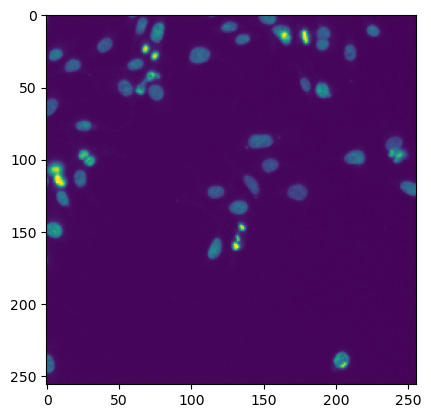

In [24]:
## Load input test image as an array
input_image = load_array(model.inputs[0].test_tensor)
print(f"Test input array shape: {input_image.shape}")
## Plot input test image
plt.imshow(np.squeeze(input_image))
plt.show()


## 4.3 `predict` function 

The most direct way to run a model prediction is using the `bioimageio.core.predict` function, to which you pass the model you want to predict with and the input you want to predict on, along with optional keyword arguments. The input can be given as a `numpy.ndarray`, `xarray.DataArray`, bioimageio `Tensor` or `pathlib.Path` to an image (`TensorSource`).

`bioimageio.core.Tensors/xarray.DataArrays` are like numpy arrays, but they have annotated axes. The axes are used to match the input image to what the model expects. You can create a Tensor instance explicitly if you want to assign a specific axis order.

**Note** the `predict` function returns a `Sample` instance which we will discuss in more detail below, but briefly it contains the output tensor along with an id.

### 4.3.1 Predict on an Numpy Array

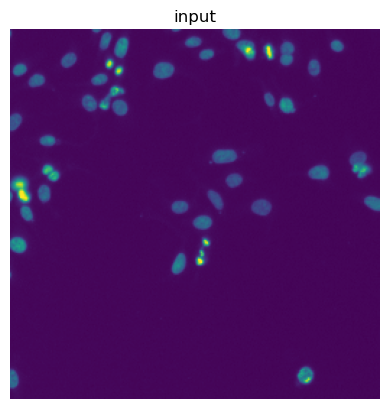

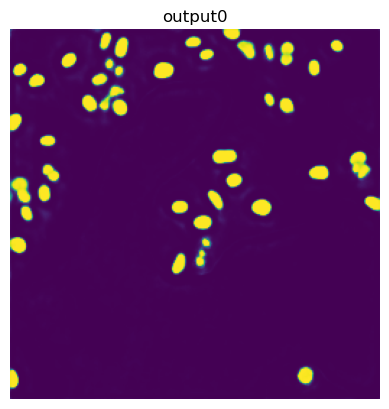

In [25]:
from bioimageio.core import predict
from bioimageio.core import Sample

# Predicting directly on an array
prediction: Sample = predict(model=model, inputs=input_image)

# show the prediction result
show_images({"input": input_image})
show_images(prediction.members)

### 4.3.2 Predict on a `TensorId` -> `TensorSource` Mapping

Sometimes a model requires multiple inputs to be passed in at once (e.g a raw data input and a mask input). To easily facilitate this inputs can be passed in as a mapping between `MemberId/TensorId` (This is a model specific id that can be found a models description as shown below) and `TensorSource`.

In [26]:
for inp in model.inputs:
    print(f" - Input TensorId '{inp.id}'")
    if isinstance(inp.axes, str):
        print(" - Input with axes:", ([i for i in inp.axes]))
    else:
        print(" - Input with axes:", ([i.id for i in inp.axes]))

 - Input TensorId 'input0'
 - Input with axes: ['batch', 'channel', 'y', 'x']


**Note** In the above print out we can also see the axis order that the model expects, in some cases it may be important to explicity set this order and ensure that your input data matches. As mentioned before can set he axes order by using a `bioimageio.core.Tensors/xarray.DataArrays` instance.

In [27]:
input_tensor = Tensor.from_numpy(input_image, dims=model.inputs[0].axes)
# print the axis annotations ('dims') and the shape of the input array
print(f"tensor shape: {input_tensor.tagged_shape}")

tensor shape: Frozen({'batch': 1, 'channel': 1, 'y': 256, 'x': 256})


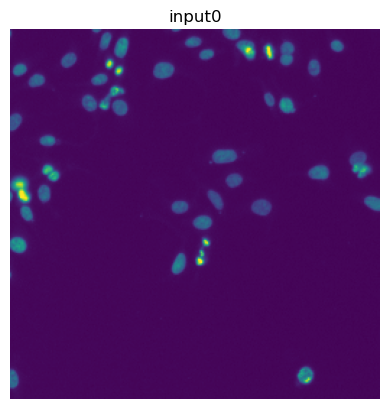

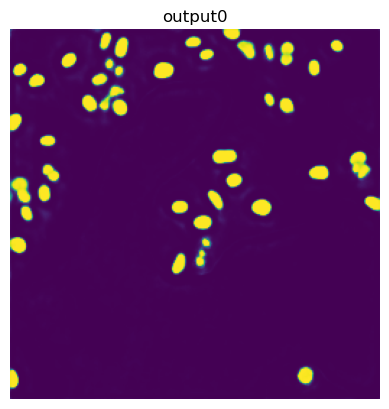

In [28]:
input = {model.inputs[0].id: input_tensor}

prediction: Sample = predict(model=model, inputs=input)

# show the input and prediction result
show_images(input | prediction.members)

### 4.3.3 Predict on a `Sample`

Alternatively, instead of directly setting input as a Mapping[TensorId, TensorSource] we can set input to be a `Sample` instance. Inside `predict` a `Sample` will actually be created no matter the given input type. The `Sample` instance can be created explicitly for a given model using the helper function `create_sample_for_model`. Another useful functionality of `Sample` is that it can keep track of precomputed sample and dataset statistics, which certain preprocessing steps require.

A collection of tensors is called a `Sample`.

In the case of the `affable-shark` model it only has one input, but for models with multiple inputs a `Sample` includes a tensor for each input.

In [29]:
from bioimageio.core import Sample
from bioimageio.core.stat_measures import DatasetMean

sample = Sample(
    members={"raw": input_tensor}, 
    stat={DatasetMean(member_id=TensorId("raw")): 123.456}, # Example mean value
    id="sample-from-numpy"
)

sample

Sample(members={'raw': <bioimageio.core.tensor.Tensor object at 0x16d90c2e0>}, stat={DatasetMean(member_id='raw', scope='dataset', name='mean', axes=None): 123.456}, id='sample-from-numpy')

The helper function `get_test_inputs` directly imports the test input sample for a given model.

In [30]:
## Load input test image as a tensor
test_sample = get_test_inputs(model)
print("Test input tensor:")
test_sample

Test input tensor:


Sample(members={'input0': <bioimageio.core.tensor.Tensor object at 0x168df4be0>}, stat={}, id='test-sample')

`bioimageio.core` also provides the helper function `create_sample_for_model` to automatically create the `Sample` for the given model.
<a id='create_sample_for_model'></a>

In [31]:
from bioimageio.core.digest_spec import create_sample_for_model
from bioimageio.spec.utils import download

input_paths = {ipt.id: download(ipt.test_tensor).path for ipt in model.inputs}
print(f"input paths: {input_paths}")
assert isinstance(model, ModelDescr)
sample = create_sample_for_model(
    model=model, inputs=input_paths, sample_id="my_demo_sample"
)

sample

input paths: {'input0': PosixPath('/Users/talks/Library/Caches/bioimageio/277e1abf8d7287b159459f2288fbcfa1-test_input_0.npy')}


Sample(members={'input0': <bioimageio.core.tensor.Tensor object at 0x16d9b4790>}, stat={}, id='my_demo_sample')

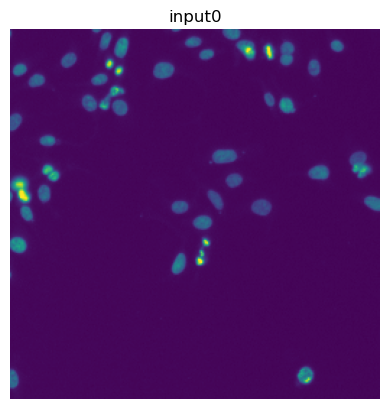

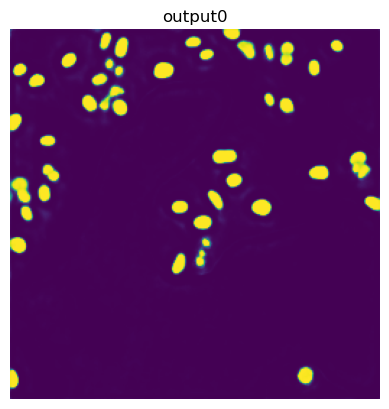

In [32]:
prediction: Sample = predict(model=model, inputs=sample)

# show the prediction result
show_images(sample.members)
show_images(prediction.members)

## 4.4 `Predict_many` function

If you need to do many predictions it more effcient to use the `predict_many` function. This avoids reloading the model (onto GPU) repeatably for each sample, which happens for the `predict` function.

  0%|          | 0/1 [00:00<?, ?it/s]

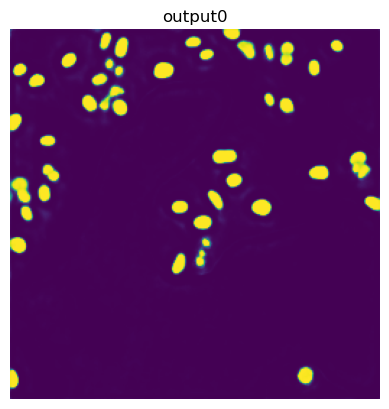

100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


In [33]:
from bioimageio.core import predict_many

for prediction in predict_many(model=model, inputs=[sample]):
    show_images(prediction.members)

## 4.5 Using a prediction pipeline (Advanced)

The `prediction_pipeline` function is used to run a prediction with a given model and provides more finegrained control for model prediction.
- It applies the __pre-processing__, if indicated in the model rdf.yaml, runs __inference__ with the model and applies the __post-processing__, again if specified in the model rdf.yaml.
- The `devices` argument can be used to specify which device(s), CPU, a single GPU, or multiple GPUs (not implemented yet), to use for inference with the model.
- The default is `devices=None`, this will use a __GPU__ if available, otherwise it uses the __CPU__.
- The `weight_format` argument can be used to specify which of the model's available weight formats to use.
- The deafult is `weight_format=None`, this will use the weight format with highest priority (as defined by bioimageio.core).
- It expects and returns a `Sample` object (i.e., sample of Tensors as input).

Here we use the prediction pipeline to process the previously loaded test image.


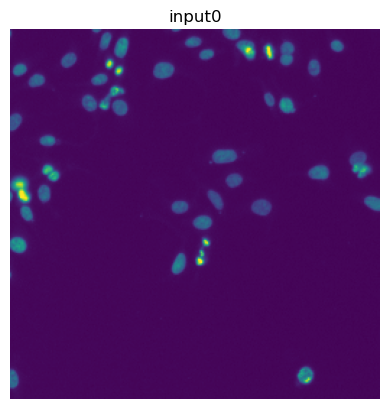

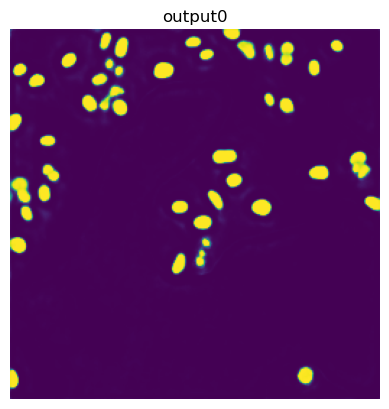

In [34]:
devices = None
weight_format = None

prediction_pipeline = create_prediction_pipeline(
    model, devices=devices, weight_format=weight_format
)
prediction: Sample = prediction_pipeline.predict_sample_without_blocking(test_sample)

# show the prediction result
#show_images(test_sample, prediction)
show_images(test_sample.members | prediction.members)

## 4.6 Recover input and output tensors as numpy arrays

This example code shows how to recover the image information from the input and output tensors as numpy arrays.

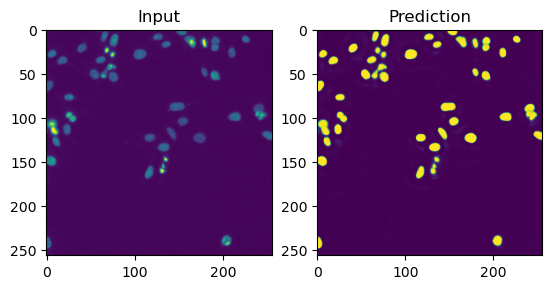

In [35]:
np_input_list = []
np_output_list = []

# iterate over the number of tensors inside the input sample
for ipt in range(len(test_sample.members.keys())):
    input_array = test_sample.members[f"input{ipt}"].data

    # Check for the number of channels to enable display
    input_array = np.squeeze(input_array)
    if len(input_array.shape) > 2:
        input_array = input_array[0]

    np_input_list.append(input_array)

# iterate over the number of tensors inside the output prediction
for out in range(len(prediction.members.keys())):
    output_array = prediction.members[f"output{ipt}"].data

    # Check for the number of channels to enable display
    output_array = np.squeeze(output_array)
    if len(output_array.shape) > 2:
        output_array = output_array[0]

    np_output_list.append(output_array)
## Plot
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np_input_list[0])
plt.title("Input")
plt.subplot(1,2,2)
plt.imshow(np_output_list[0])
plt.title("Prediction")
plt.show()

## 4.7 Running predictions on a locally stored image

Note that you may need to change the `path_image` depending on whether this is running locally or on Google Colab. Generally it may look like one of the followings:
- Google colab: `path_image = "/content/AI4Life_CommunityEvent_W1S2/example-images/image3.png"`
- Locally: `path_image = "example-images/image1.png"`

Input image shape: (1, 1, 256, 256)
tensor shape: Frozen({'batch': 1, 'channel': 1, 'y': 256, 'x': 256})


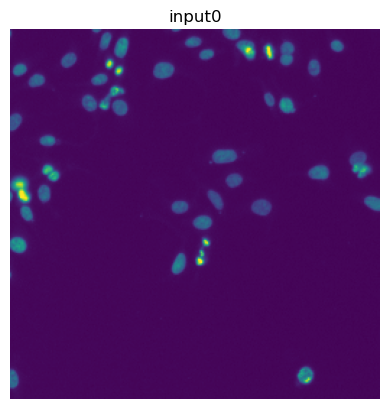

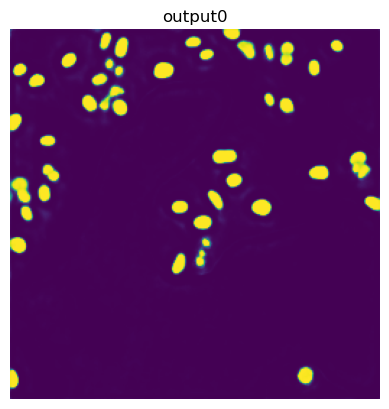

In [36]:
## Read input image as an array
path_image = "/Users/esti/Documents/CONFERENCES-TALKS/AI4LIFE_COMMUNITYEVENT/AI4Life_CommunityEvent_W1S2/example-images/image3.png" #"/content/AI4Life_CommunityEvent_W1S2/example-images/image3.png"
print(f"Input image shape: {input_image.shape}")
## Create a tensor from image array
test_input_tensor = Tensor.from_numpy(input_image, dims=model.inputs[0].axes)
# print the axis annotations ('dims') and the shape of the input array
print(f"tensor shape: {test_input_tensor.tagged_shape}")

## Create a sample of tensors to run predictions
sample = Sample(members={"input0": test_input_tensor}, stat={}, id="sample-from-numpy")

# Run the prediction and display it
prediction: Sample = predict(model=model, inputs=sample)
show_images(sample.members | prediction.members)

## 4.8 Running predictions on locally stored images

TASK: You need to change the `path_images` variable below

  0%|          | 0/3 [00:00<?, ?it/s]

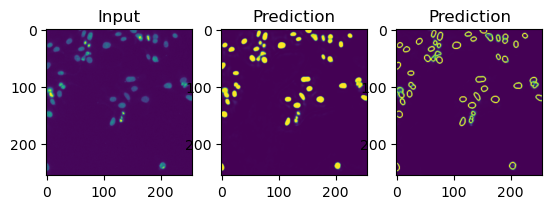

 33%|███▎      | 1/3 [00:01<00:03,  1.91s/it]

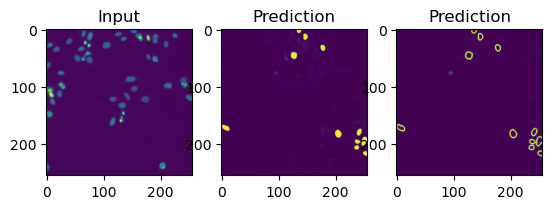

 67%|██████▋   | 2/3 [00:03<00:01,  1.91s/it]

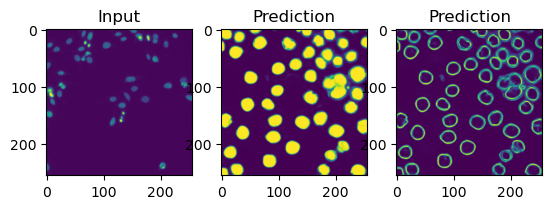

100%|██████████| 3/3 [00:05<00:00,  1.97s/it]


In [ ]:
path_images = "/Users/esti/Documents/CONFERENCES-TALKS/AI4LIFE_COMMUNITYEVENT/AI4Life_CommunityEvent_W1S2/example-images"
images = os.listdir(path_images)
# Create a list of iterable paths
input_paths = [{model.inputs[0].id: Path(os.path.join(path_images,path))} for path in images]

# Create a generator for the prediction
prediction = predict_many(model=model, inputs=input_paths)

#Display the results
for result in prediction:
    k=2
    output_array = result.members[model.outputs[0].id].data
    output_array = np.squeeze(output_array)
    ## Display
    # Check for the number of channels to enable display
    if len(output_array.shape) > 2:
        k = 3
    plt.subplot(1,k,1)
    plt.title("Input")
    plt.imshow(imread(input_paths[0][model.inputs[0].id]))
    for i in range(2, k+1):
        plt.subplot(1,k,i)
        plt.title("Prediction")
        plt.imshow(output_array[i-2])
    plt.show()